In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 21:41:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-10-07 21:41:51 (178 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [13]:
import pandas as pd

df = pd.read_csv('car_fuel_efficiency.csv', usecols=['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg'])
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


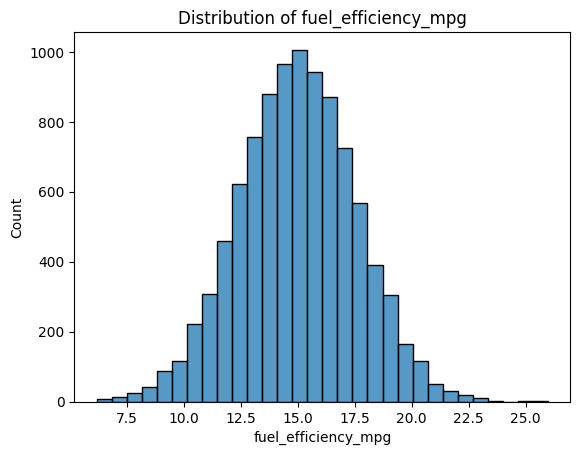

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot fuel_efficiency_mpg
sns.histplot(df['fuel_efficiency_mpg'], bins=30)
plt.xlabel('fuel_efficiency_mpg')
plt.ylabel('Count')
plt.title('Distribution of fuel_efficiency_mpg')
plt.show()

### Question 1

In [6]:
# Check for missing values
print(df.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


### Question 2

In [7]:
# median horsepower
median_hp = df['horsepower'].median()
median_hp

np.float64(149.0)

### Question 3

In [14]:
#Shuffle the dataset (the filtered one you created above), use seed 42.
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into train/val/test sets. Use 60% of the data for training, 20% for validation, and 20% for testing.
train_size = int(0.6 * len(df))
val_size = int(0.2 * len(df))
test_size = len(df) - train_size - val_size

train_df = df[:train_size]
val_df = df[train_size:train_size + val_size]
test_df = df[train_size + val_size:]

In [10]:
# fill missing value in horsepower with mean of the column
mean_hp = train_df['horsepower'].mean()
train_df['horsepower'].fillna(mean_hp, inplace=True)
# For computing the mean, use the training only!
val_df['horsepower'].fillna(mean_hp, inplace=True)
test_df['horsepower'].fillna(mean_hp, inplace=True)

# Train a linear regression model without any regularization using the four features.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target
features = ['engine_displacement','horsepower','vehicle_weight','model_year']
target = 'fuel_efficiency_mpg'

# Initialize model
model = LinearRegression()

# Train model
model.fit(train_df[features], train_df[target])

# Make predictions
val_preds = model.predict(val_df[features])

# Evaluate model
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
val_mse = mean_squared_error(val_df[target], val_preds)
val_rmse = round(val_mse ** 0.5, 2)
val_rmse

/tmp/ipykernel_6543/1158926824.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['horsepower'].fillna(mean_hp, inplace=True)
/tmp/ipykernel_6543/1158926824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['horsepower'].fillna(mean_hp, inplace=True)
/tmp/ipykernel_6543/1158926824.py:5: FutureWarning: A value is trying to 

0.46

In [ ]:
# fill missing value in horsepower with 0
train_df['horsepower'].fillna(0, inplace=True)
val_df['horsepower'].fillna(0, inplace=True)
test_df['horsepower'].fillna(0, inplace=True)
# train a linear regression model without regularization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train_df[features], train_df[target])
# Make predictions
val_preds = model.predict(val_df[features])
# Evaluate model
val_mse = mean_squared_error(val_df[target], val_preds)
val_rmse = round(val_mse ** 0.5, 2)
val_rmse

/tmp/ipykernel_6543/62707202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/62707202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/62707202.py:3: FutureWarning: A value is trying to be set on a copy o

0.52

### Question 4

In [ ]:
train_df['horsepower'].fillna(0, inplace=True)
val_df['horsepower'].fillna(0, inplace=True)
test_df['horsepower'].fillna(0, inplace=True)

# train a linear regression model with regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100]
ridge_alphas = [0, 0.01, 0.1, 1, 5, 10, 100]
results = []
for alpha in ridge_alphas:
    model = Ridge(alpha=alpha)
    model.fit(train_df[features], train_df[target])
    val_preds = model.predict(val_df[features])
    val_mse = mean_squared_error(val_df[target], val_preds)
    val_rmse = round(val_mse ** 0.5, 2)
    results.append((alpha, val_rmse))

results

/tmp/ipykernel_6543/266096370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/266096370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/266096370.py:2: FutureWarning: A value is trying to be set on a cop

[(0, 0.52),
 (0.01, 0.52),
 (0.1, 0.52),
 (1, 0.52),
 (5, 0.52),
 (10, 0.52),
 (100, 0.52)]

### Question 5

In [19]:
df = pd.read_csv('car_fuel_efficiency.csv', usecols=['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg'])

# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seeds = list(range(10))
final_results = []
for seed in seeds:
    # Shuffle the dataset (the filtered one you created above), use seed 42.
    df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

    # Split the dataset into train/val/test sets. Use 60% of the data for training, 20% for validation, and 20% for testing.
    train_size = int(0.6 * len(df))
    val_size = int(0.2 * len(df))
    test_size = len(df) - train_size - val_size

    train_df = df[:train_size]
    val_df = df[train_size:train_size + val_size]
    test_df = df[train_size + val_size:]

    # fill missing value in horsepower with 0
    train_df['horsepower'].fillna(0, inplace=True)
    val_df['horsepower'].fillna(0, inplace=True)
    test_df['horsepower'].fillna(0, inplace=True)

    model = Ridge(alpha=1)
    model.fit(train_df[features], train_df[target])
    val_preds = model.predict(val_df[features])
    val_mse = mean_squared_error(val_df[target], val_preds)
    val_rmse = round(val_mse ** 0.5, 2)
    final_results.append((seed, val_rmse))

# find standard deviation of the RMSE values
import numpy as np
rmse_values = [result[1] for result in final_results]
round(np.std(rmse_values), 3)


/tmp/ipykernel_6543/441347576.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/441347576.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/441347576.py:21: FutureWarning: A value is trying to be set on a 

np.float64(0.006)

### Question 6

In [22]:
df = pd.read_csv('car_fuel_efficiency.csv', usecols=['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg'])

# Shuffle the dataset (the filtered one you created above), use seed 9.
df = df.sample(frac=1, random_state=9).reset_index(drop=True)

# Split the dataset into train/test sets. Use 80% of the data for training and 20% for testing.
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_df = df[:train_size]
test_df = df[train_size:]

# fill missing value in horsepower with 0
train_df['horsepower'].fillna(0, inplace=True)
test_df['horsepower'].fillna(0, inplace=True)

# train a linear regression model with regularization, r=0.001
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model = Ridge(alpha=0.001)
model.fit(train_df[features], train_df[target])
# Make predictions
test_preds = model.predict(test_df[features])
# Evaluate model
test_mse = mean_squared_error(test_df[target], test_preds)
test_rmse = round(test_mse ** 0.5, 4)
test_rmse

/tmp/ipykernel_6543/2194592286.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/2194592286.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6543/2194592286.py:15: FutureWarning: A value is trying to be set on

0.5156